In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
P8_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Participant-08.csv", sep=",")
P8_data 

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0
...,...,...,...
6100,12-Sep-2022 03:00,12-Sep-2022 04:00,0.0
6101,12-Sep-2022 04:00,12-Sep-2022 05:00,0.0
6102,12-Sep-2022 05:00,12-Sep-2022 06:00,25.0
6103,12-Sep-2022 06:00,12-Sep-2022 07:00,0.0


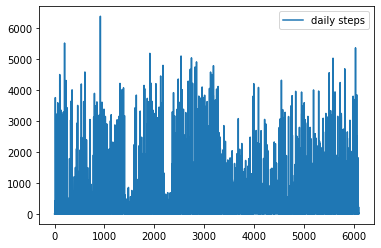

In [ ]:
y = P8_data['Steps (count)']
# x = np.linspace(0,6133)
plt.plot(y,label = 'daily steps')
plt.legend()
plt.show()

In [ ]:
P8_data['Steps (count)'].fillna(0,inplace = True)
data08 = P8_data.drop(['Start'],axis = 1)
data08

,Finish,Steps (count)
0,01-Jan-2022 01:00,0.0
1,01-Jan-2022 02:00,0.0
2,01-Jan-2022 03:00,0.0
3,01-Jan-2022 04:00,0.0
4,01-Jan-2022 05:00,0.0
...,...,...
6100,12-Sep-2022 04:00,0.0
6101,12-Sep-2022 05:00,0.0
6102,12-Sep-2022 06:00,25.0
6103,12-Sep-2022 07:00,0.0


In [ ]:
Date = data08['Finish']
# for i in range(count(Date))
dates= []
p = len(Date)
i = 0
for i in range(p):
  Date[i] = Date[i][0:11]
  dates.append(Date[i])
# dates

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# Date01 = data07['Finish']
# date07 = []
# for i in range(len(Date01)):
#   for line in Date01:
#     if line[3:6] == 'Jan':
#       line[3:6].replace('01')
      
#     elif line[3:6] =='Feb':
#       line[3:6] = '2'
#     else:
#       pass


In [ ]:
data08

,Finish,Steps (count)
0,01-Jan-2022,0.0
1,01-Jan-2022,0.0
2,01-Jan-2022,0.0
3,01-Jan-2022,0.0
4,01-Jan-2022,0.0
...,...,...
6100,12-Sep-2022,0.0
6101,12-Sep-2022,0.0
6102,12-Sep-2022,25.0
6103,12-Sep-2022,0.0


In [ ]:
data08['Finish'] = data08['Finish'].apply(pd.to_datetime)
data08
# print(type(data07['Finish']))

,Finish,Steps (count)
0,2022-01-01,0.0
1,2022-01-01,0.0
2,2022-01-01,0.0
3,2022-01-01,0.0
4,2022-01-01,0.0
...,...,...
6100,2022-09-12,0.0
6101,2022-09-12,0.0
6102,2022-09-12,25.0
6103,2022-09-12,0.0


In [ ]:
data08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6105 entries, 0 to 6104
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Finish         6105 non-null   datetime64[ns]
 1   Steps (count)  6105 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 95.5 KB


In [ ]:
weeksum = pd.DataFrame(data08.resample('w',on = 'Finish')['Steps (count)'].sum()).reset_index()
weeksum.head(10)

,Finish,Steps (count)
0,2022-01-02,14973.0
1,2022-01-09,51069.0
2,2022-01-16,48085.0
3,2022-01-23,43866.0
4,2022-01-30,52397.0
5,2022-02-06,50535.0
6,2022-02-13,73614.0
7,2022-02-20,51934.0
8,2022-02-27,65813.0
9,2022-03-06,24575.0


In [ ]:
import plotly.express as px
plot = px.box(weeksum,x ='Steps (count)')
plot.show()

In [ ]:
fig = px.histogram(weeksum, x="Finish",y ='Steps (count)' ,nbins =len(weeksum),color_discrete_sequence=['indianred'])
fig.show()

In [ ]:
W8 = weeksum.groupby([weeksum['Finish'].dt.isocalendar().week]).sum().rename_axis(['week']).reset_index()
W8.head(10)

,week,Steps (count)
0,1,51069.0
1,2,48085.0
2,3,43866.0
3,4,52397.0
4,5,50535.0
5,6,73614.0
6,7,51934.0
7,8,65813.0
8,9,24575.0
9,10,54882.0


In [ ]:
fig = px.pie(W8, values='Steps (count)', names='week', title="Weeks of steps")
fig.show()

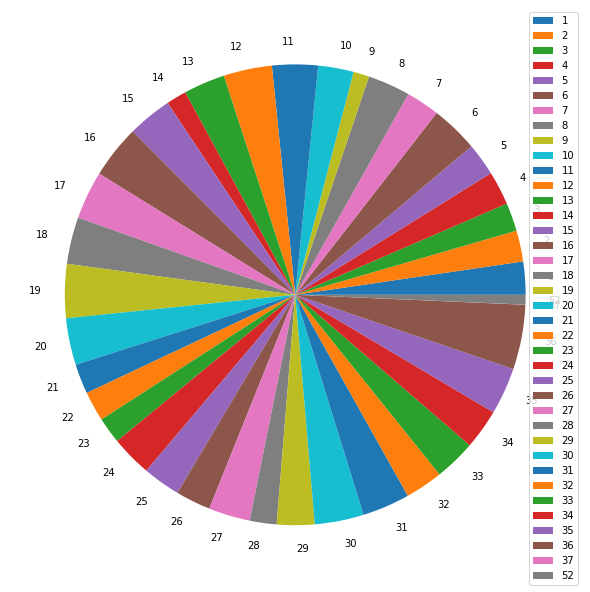

In [ ]:
plt.pie(W8['Steps (count)'], labels =W8['week'])
plt.subplots_adjust(0.1,0,2,2)
plt.legend()
plt.show() 

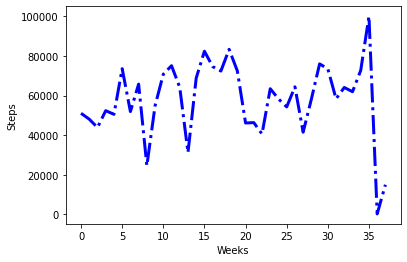

In [ ]:
plt.plot(W8['Steps (count)'], color = 'blue', linewidth=3, linestyle='-.')
plt.xlabel("Weeks")
plt.ylabel("Steps")
plt.show()